In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']= (10,8)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [159]:
train.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


In [4]:
test.head()

,Viewers_ID,Joke_identifier,Response_ID
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3


In [5]:
train['Viewers_ID'].value_counts()

A366      54
A233      54
A367      54
A179      54
A337      54
          ..
A14786     2
A17926     2
A30007     2
A37195     2
A15489     2
Name: Viewers_ID, Length: 40863, dtype: int64

In [7]:
train.isna().sum()

Viewers_ID         0
Joke_identifier    0
Response_ID        0
Rating             0
dtype: int64

In [8]:
test.isna().sum()

Viewers_ID         0
Joke_identifier    0
Response_ID        0
dtype: int64

No null Values

In [9]:
train.describe()

,Rating
count,612702.000000
mean,0.647024
std,2.667301
min,-5.000000
25%,-1.300000
50%,0.950000
75%,2.690000
max,5.000000


<AxesSubplot:ylabel='Frequency'>

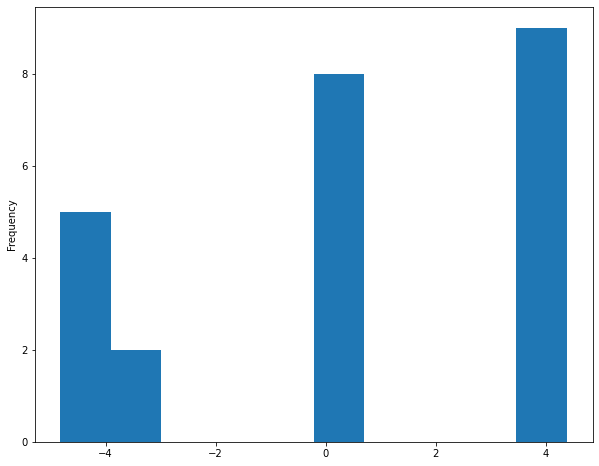

In [14]:
train.groupby('Viewers_ID').get_group('A1')['Rating'].plot(kind='hist')

<AxesSubplot:xlabel='Rating', ylabel='Density'>

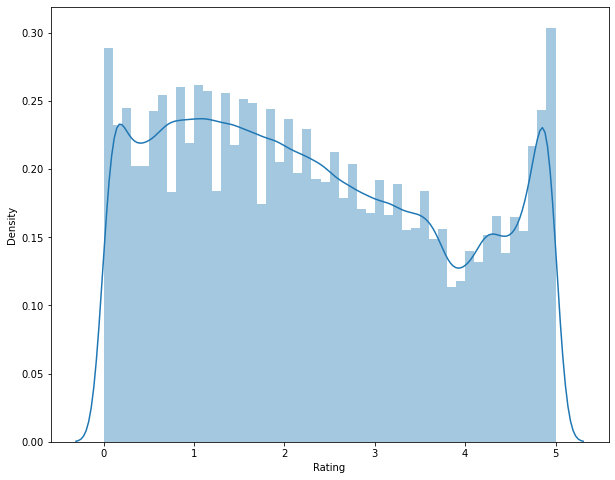

In [160]:
sns.distplot(np.abs(train['Rating']))

In [18]:
train.groupby('Viewers_ID')['Rating'].mean()

Viewers_ID
A1        0.422500
A10       0.407500
A100      0.519565
A1000    -1.621250
A10000    0.382500
            ...   
A9995     1.480000
A9996    -4.500000
A9997     1.444667
A9998     1.067500
A9999     0.610667
Name: Rating, Length: 40863, dtype: float64

In [3]:
train['Response_ID']  = train['Response_ID'].str.replace('_'," ")
test['Response_ID']  = test['Response_ID'].str.replace('_'," ")

In [65]:
train['Joke_identifier'].unique()

array(['Klint De Drunk Enugu 1', 'Klint De Drunk Enugu 2',
       'Klint De Drunk PH 1', 'Klint De Drunk PH 2',
       'Klint De Drunk Lagos 1', 'Klint De Drunk Lagos 2',
       'Klint De Drunk Lagos 3', 'Klint De Drunk Warri 1 ',
       'AliBaba Lagos 2', 'AliBaba Aso Rock 2', 'AliBaba Abuja 2',
       'AliBaba PH 1', 'AliBaba PH 4', 'AliBaba PH 5',
       'BasketMouth Lagos 1', 'BasketMouth Abuja 3', 'AY Lagos 4',
       'AY Abuja 3', 'AY Warri 1', 'AY Warri 2', 'Bovi Lagos 3',
       'Bovi Lagos 4', 'Bovi Abuja 4', 'Akpororo Warri 2',
       'Klint De Drunk Warri 2', 'AliBaba Lagos 1', 'AliBaba Lagos 3',
       'AliBaba Lagos 5', 'AliBaba Aso Rock 1', 'AliBaba Abuja 1',
       'AliBaba Abuja 3', 'AliBaba PH 2', 'BasketMouth Lagos 3',
       'BasketMouth Lagos 4', 'BasketMouth Abuja 2',
       'BasketMouth Owerri 2', 'AY Lagos 1', 'AY Lagos 3', 'Bovi Warri 1',
       'Bovi Warri 2', 'Bovi Warri 3', 'Bovi Abuja 1', 'Bovi Abuja 5',
       'Akpororo Warri 1', 'Akpororo Warri 3', 'Akporo

In [15]:
train[train['Response_ID'].str.contains("Klint")]['Response_ID'].apply(lambda x: x[:2:-1])

0             1 ugunE knurD eD tnilK
1             2 ugunE knurD eD tnilK
2                1 HP knurD eD tnilK
3                2 HP knurD eD tnilK
4             1 sogaL knurD eD tnilK
                     ...            
612685     1 sogaL knurD eD tnilK 89
612686     1 irraW knurD eD tnilK 89
612687     2 ugunE knurD eD tnilK 99
612688        2 HP knurD eD tnilK 99
612689     2 sogaL knurD eD tnilK 99
Name: Response_ID, Length: 201041, dtype: object

In [50]:
train[train['Joke_identifier'].str.contains("Klint")]['Response_ID'].apply()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83
...,...,...,...,...
612685,A9998,Klint De Drunk Lagos 1,A9998_Klint De Drunk Lagos 1,-4.59
612686,A9998,Klint De Drunk Warri 1,A9998_Klint De Drunk Warri 1,3.67
612687,A9999,Klint De Drunk Enugu 2,A9999_Klint De Drunk Enugu 2,-1.34
612688,A9999,Klint De Drunk PH 2,A9999_Klint De Drunk PH 2,-2.47


In [24]:
train_pivot = train.pivot_table(values='Rating',columns='Joke_identifier',index='Viewers_ID').fillna(0)
train_pivot.T

Viewers_ID,A1,A10,A100,A1000,A10000,A10001,A10002,A10003,A10004,A10005,...,A9990,A9991,A9992,A9993,A9994,A9995,A9996,A9997,A9998,A9999
Joke_identifier,,,,,,,,,,,,,,,,,,,,,
AY Abuja 1,0.00,0.0,0.00,1.47,0.0,0.0,0.0,0.0,0.0,0.0,...,3.22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
AY Abuja 2,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
AY Abuja 3,0.03,0.0,-3.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
AY Lagos 1,0.00,0.0,3.09,-2.52,0.0,0.0,0.0,0.0,0.0,0.0,...,2.02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
AY Lagos 2,0.00,0.0,0.00,1.58,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seyi Law Ibadan 2,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
Seyi Law Ibadan 3,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
Seyi Law Lagos 1,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


In [4]:
train.drop(columns='Joke_identifier',inplace=True)
test.drop(columns='Joke_identifier',inplace=True)

In [5]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming train is your DataFrame
movie_names = train['Response_ID']

# Tokenize movie names
tokenized_movie_names = [word_tokenize(name) for name in movie_names]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_movie_names, vector_size=100, window=5, min_count=1, sg=0)

# Create embeddings for a movie name
def get_movie_embedding(movie_name):
    tokens = word_tokenize(movie_name)
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)
    return None

# Create a new column 'Response_Embedding' with movie embeddings
train['Response_Embedding'] = train['Response_ID'].apply(get_movie_embedding)
test['Response_Embedding'] = test['Response_ID'].apply(get_movie_embedding)
# Now train['Response_Embedding'] contains the embeddings for each movie name


In [73]:
train

,Viewers_ID,Response_ID,Rating,Response_Embedding
0,A1,A1 Klint De Drunk Enugu 1,0.11,"[0.050084908, -1.7863383, 1.0159727, 0.5362701..."
1,A1,A1 Klint De Drunk Enugu 2,-4.64,"[-0.0516154, -1.7980639, 1.0149225, 0.38131452..."
2,A1,A1 Klint De Drunk PH 1,-3.39,"[-0.058436353, -1.7021357, 1.0423261, 0.463207..."
3,A1,A1 Klint De Drunk PH 2,0.44,"[-0.16013665, -1.7138613, 1.0412759, 0.3082515..."
4,A1,A1 Klint De Drunk Lagos 1,-4.83,"[0.015525326, -1.8958448, 1.0688994, 0.296354,..."
...,...,...,...,...
612697,A9999,A9999 Gordons Lagos 2,-0.92,"[-0.5680772, -0.78786176, 0.29374933, 0.132056..."
612698,A9999,A9999 Gordons Lagos 3,2.44,"[-0.5055736, -0.766716, 0.2658307, -0.04610327..."
612699,A9999,A9999 Gordons Lagos 4,1.03,"[-0.6094654, -0.46450326, -0.25645667, -0.1089..."
612700,A9999,A9999 Gordons Abuja 1,1.22,"[-0.37074178, -0.25458175, -0.13701251, -0.033..."


In [ ]:
"""not run"""

# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(train['Joke_identifier'])

In [6]:
df_train = train.copy()

In [7]:
# Assuming X_train['Response_Embedding'] is a column containing lists/arrays
# Flattening the arrays and converting to a DataFrame
embedding_df = pd.DataFrame(df_train['Response_Embedding'].tolist(), columns=[f'feature_{i}' for i in range(len(df_train['Response_Embedding'][0]))])

# Drop the original 'Response_Embedding' column from X_train
df_train.drop('Response_Embedding', axis=1, inplace=True)

# Concatenate the flattened DataFrame with X_train
df_train = pd.concat([df_train, embedding_df], axis=1)


In [8]:
# Assuming X_train['Response_Embedding'] is a column containing lists/arrays
# Flattening the arrays and converting to a DataFrame
embedding_df = pd.DataFrame(test['Response_Embedding'].tolist(), columns=[f'feature_{i}' for i in range(len(test['Response_Embedding'][0]))])

# Drop the original 'Response_Embedding' column from X_train
test.drop('Response_Embedding', axis=1, inplace=True)

# Concatenate the flattened DataFrame with X_train
test = pd.concat([test, embedding_df], axis=1)

In [133]:
test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,0.019426,0.205437,0.239951,-0.507897,0.895035,-0.566612,0.257437,1.245524,-0.620225,-0.525064,...,0.008037,0.052177,0.300683,0.738531,0.164291,0.506378,-0.364966,-0.209868,-0.594614,-0.026863
1,-0.084852,0.354620,-0.291150,-0.684643,0.798320,-0.427083,-0.075842,0.622718,-0.483243,-0.261072,...,0.113680,0.078350,0.365938,0.260453,0.475018,0.608703,0.237039,-0.028161,-0.293543,0.082601
2,-0.063050,0.544252,-1.039588,-0.929004,1.140512,-0.300807,-0.310050,0.182058,0.105653,0.327263,...,0.571103,-0.058228,0.671119,-0.347511,0.560455,1.022239,1.355434,-0.103690,-0.147047,0.063530
3,-1.222945,-0.535019,-1.015687,0.238811,-0.933813,0.508524,0.152379,0.028098,-1.234968,-1.001197,...,-1.226721,0.068910,-0.487321,0.427354,1.191524,-0.758688,-0.643831,0.311371,2.096568,0.730601
4,-1.243438,-0.615026,-0.924105,0.185088,-1.243845,0.428768,0.240430,0.047894,-1.238257,-0.916543,...,-1.264374,0.046255,-0.482707,0.282676,0.947306,-0.422869,-0.355167,0.205919,2.100887,0.785053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435868,-0.169871,0.109765,0.052579,-0.428601,0.929567,-0.226371,0.187533,1.097942,-0.330240,-0.464236,...,-0.067347,0.189942,0.399413,0.638397,0.176374,0.076384,-0.176453,-0.381750,-0.407049,-0.151149
435869,-0.284537,0.064282,0.148768,-0.559727,0.894484,-0.066174,0.352666,0.883495,-0.117257,-0.379771,...,-0.041543,0.202989,0.447381,0.532447,0.049799,0.097879,-0.073539,-0.355538,-0.379892,-0.064297
435870,-0.266423,0.114022,-0.258121,-0.665691,0.478379,-0.215947,0.032827,0.603922,-0.197174,-0.151600,...,-0.020049,0.183433,0.448570,0.082909,0.108613,0.559868,0.658410,-0.377237,-0.174378,-0.019529
435871,-0.121778,0.165961,0.172638,-0.643348,1.414949,-0.399457,0.188360,1.645369,-0.292030,-0.706516,...,-0.104732,0.270956,0.583869,0.939843,0.105194,0.119860,-0.408884,-0.550176,-0.872176,-0.169315


In [9]:
df_train.drop(columns=['Viewers_ID','Response_ID'],inplace=True)
test.drop(columns=['Viewers_ID','Response_ID'],inplace=True)

X_train= df_train.drop(columns='Rating')
y = df_train['Rating']

In [10]:
from sklearn.decomposition import TruncatedSVD

# Create a sample DataFrame with random values
# np.random.seed(0)
# data = np.random.rand(100, 100)
# df_train = pd.DataFrame(data)

# Number of components for SVD
n_components = 12

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=n_components)

# Fit and transform the DataFrame
X_train_svd = svd.fit_transform(X_train)
test_svd = svd.transform(test)

# Convert the result back to a DataFrame
X_train_svd = pd.DataFrame(X_train_svd, columns=[f'SVD_{i}' for i in range(n_components)])
test_svd = pd.DataFrame(test_svd, columns=[f'SVD_{i}' for i in range(n_components)])

# Display the result
# print(X_train_svd)


In [150]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

catReg =  CatBoostRegressor(n_estimators=3000,max_depth=8,learning_rate=0.054311625828468046,loss_function="RMSE",od_wait=200,metric_period=100)

model = catReg.fit(X_train_svd,y)
y_pred = model.predict(X_train_svd)
print(np.sqrt(mean_squared_error(y,y_pred)))

0:	learn: 2.6524779	total: 107ms	remaining: 5m 22s
100:	learn: 2.5108095	total: 10.1s	remaining: 4m 48s
200:	learn: 2.5084940	total: 19.6s	remaining: 4m 32s
300:	learn: 2.5062889	total: 29.1s	remaining: 4m 20s
400:	learn: 2.5038624	total: 38.6s	remaining: 4m 10s
500:	learn: 2.5013768	total: 48.1s	remaining: 3m 59s
600:	learn: 2.4989725	total: 57.6s	remaining: 3m 50s
700:	learn: 2.4968403	total: 1m 7s	remaining: 3m 40s
800:	learn: 2.4947165	total: 1m 16s	remaining: 3m 30s
900:	learn: 2.4926179	total: 1m 26s	remaining: 3m 20s
1000:	learn: 2.4902883	total: 1m 35s	remaining: 3m 11s
1100:	learn: 2.4882967	total: 1m 45s	remaining: 3m 1s
1200:	learn: 2.4863870	total: 1m 54s	remaining: 2m 51s
1300:	learn: 2.4843847	total: 2m 4s	remaining: 2m 42s
1400:	learn: 2.4823061	total: 2m 13s	remaining: 2m 32s
1500:	learn: 2.4803836	total: 2m 23s	remaining: 2m 23s
1600:	learn: 2.4785267	total: 2m 32s	remaining: 2m 13s
1700:	learn: 2.4767116	total: 2m 42s	remaining: 2m 3s
1800:	learn: 2.4747138	total: 2m 

In [153]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=2000)

lgbm.fit(df_train_svd,y)
y_p = lgbm.predict(df_train_svd)
print(np.sqrt(mean_squared_error(y,y_p)))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 612702, number of used features: 12
[LightGBM] [Info] Start training from score 0.647024
2.4134712533939067


In [154]:
y_test = lgbm.predict(test_svd)
y_test

array([ 1.98421634,  1.51016084,  1.44650265, ...,  1.99535769,
       -0.30004346, -0.17902534])

In [155]:
submission['Rating'] = y_test
submission

,Response_ID,Rating
0,A1_Akpororo Lagos 1,1.984216
1,A1_Akpororo Abuja 1,1.510161
2,A1_Akpororo Abuja 5,1.446503
3,A1_I Go Dye Benin 1,2.030680
4,A1_I Go Dye Benin 3,0.942513
...,...,...
435868,A9999_Funny Bone Lagos 1,0.610474
435869,A9999_Okey Bakassi Lagos 2,0.556559
435870,A9999_Okey Bakassi Abuja 3,1.995358
435871,A9999_MisterIbu Lagos 1,-0.300043


In [156]:
submission.to_csv("subx.csv",index=False)